## Appendix - Exploration of Bivectors in 4-D base-space

### Emulation of 4-D space and Bivectors

The code below produces an image that emulates bivectors in a 4 dimensional base-space. There are 6 possible combinations of bivectors. In the image we can consider just 3 such bivectors, XY, YZ and WX, the latter being the planbe that could be considers to rotate along the 𝜙 angle (please see main text for details:the relevance of the bivector planes to the Riemann sphere is dsicussed in detail in Chapter 4)

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


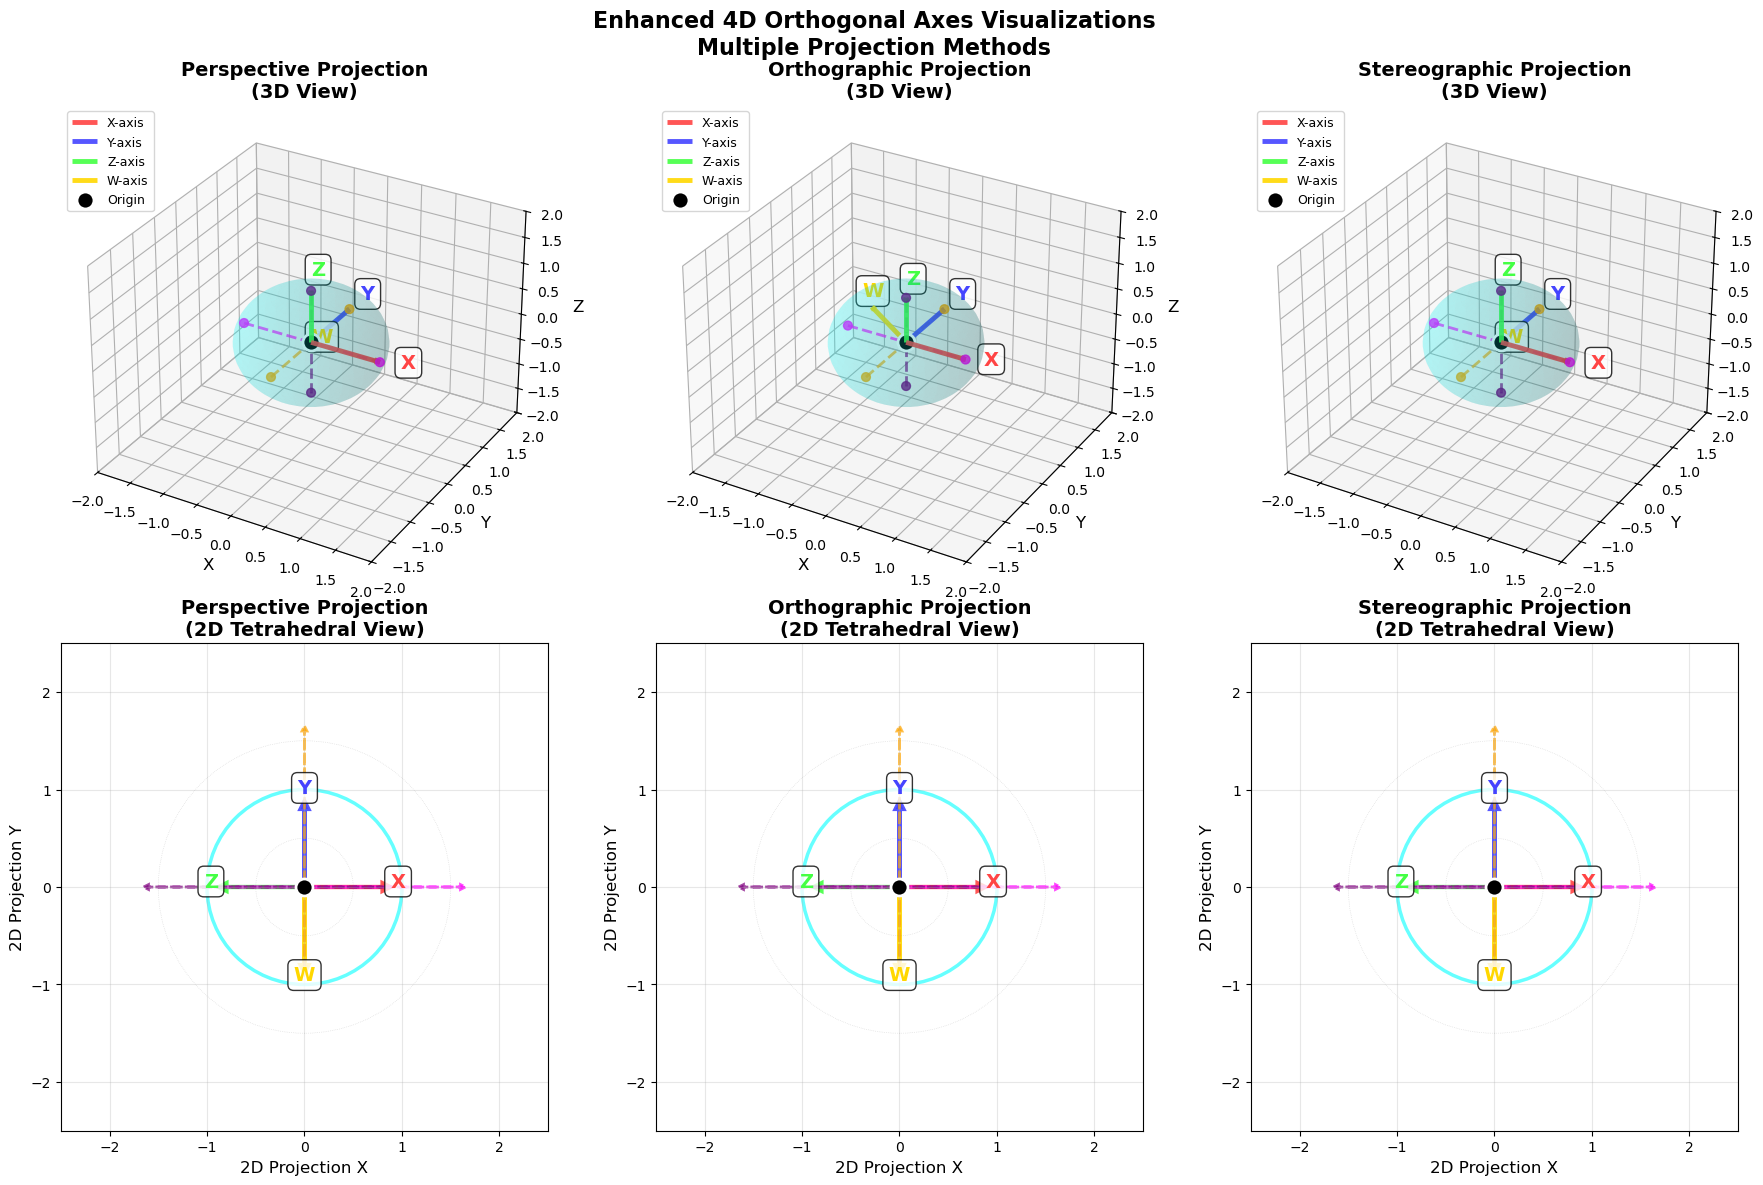

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as patches

def create_enhanced_visualization():
    # Set up the figure with multiple projections
    fig = plt.figure(figsize=(18, 12))
    
    # Create different projection methods for comparison
    projection_methods = [
        ("Perspective Projection", perspective_project_4d_to_3d),
        ("Orthographic Projection", orthographic_project_4d_to_3d),
        ("Stereographic Projection", stereographic_project_4d_to_3d)
    ]
    
    # 4D orthogonal basis vectors
    basis_4d = np.array([
        [1, 0, 0, 0],   # x-axis
        [0, 1, 0, 0],   # y-axis  
        [0, 0, 1, 0],   # z-axis
        [0, 0, 0, 1]    # w-axis
    ])
    
    colors = ['#FF4444', '#4444FF', '#44FF44', '#FFD700']  # Red, Blue, Green, Gold
    axis_labels = ['X', 'Y', 'Z', 'W']
    
    for idx, (method_name, projection_func) in enumerate(projection_methods):
        # Create 3D subplot
        ax = fig.add_subplot(2, 3, idx + 1, projection='3d')
        
        # Project the basis vectors
        projected_axes = np.array([projection_func(axis) for axis in basis_4d])
        
        # Draw axes with enhanced visibility
        for i, (axis_end, color, label) in enumerate(zip(projected_axes, colors, axis_labels)):
            ax.quiver(0, 0, 0, axis_end[0], axis_end[1], axis_end[2], 
                     color=color, arrow_length_ratio=0.08, linewidth=3.5, 
                     alpha=0.9, label=f'{label}-axis')
            
            # Add axis labels with background
            ax.text(axis_end[0]*1.3, axis_end[1]*1.3, axis_end[2]*1.3, label, 
                   color=color, fontsize=14, fontweight='bold',
                   bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))
        
        # Draw origin
        ax.scatter([0], [0], [0], color='black', s=150, marker='o', 
                  edgecolors='white', linewidth=2, label='Origin', zorder=5)
        
        # Enhanced unit sphere
        u = np.linspace(0, 2 * np.pi, 40)
        v = np.linspace(0, np.pi, 30)
        x_sphere = np.outer(np.cos(u), np.sin(v))
        y_sphere = np.outer(np.sin(u), np.sin(v))
        z_sphere = np.outer(np.ones(np.size(u)), np.cos(v))
        
        ax.plot_surface(x_sphere, y_sphere, z_sphere, alpha=0.15, 
                       color='cyan', edgecolor='none')
        
        # Multiple antipodal axes for visual variety
        antipodal_configs = [
            (np.array([1, 0, 0]), 'magenta'),
            (np.array([0, 1, 0]), 'orange'),
            (np.array([0, 0, 1]), 'purple')
        ]
        
        for direction, color in antipodal_configs:
            # Project antipodal points
            pos_point = projection_func(np.concatenate([direction, [0]]))
            neg_point = projection_func(np.concatenate([-direction, [0]]))
            
            # Draw antipodal axis
            ax.plot([neg_point[0], pos_point[0]], 
                   [neg_point[1], pos_point[1]], 
                   [neg_point[2], pos_point[2]], 
                   color=color, linewidth=2, alpha=0.7, linestyle='--')
            
            # Mark endpoints
            ax.scatter([pos_point[0], neg_point[0]], 
                      [pos_point[1], neg_point[1]], 
                      [pos_point[2], neg_point[2]], 
                      color=color, s=40, alpha=0.8)
        
        ax.set_xlabel('X', fontsize=12)
        ax.set_ylabel('Y', fontsize=12)
        ax.set_zlabel('Z', fontsize=12)
        ax.set_title(f'{method_name}\n(3D View)', fontsize=14, fontweight='bold')
        ax.set_xlim([-2, 2])
        ax.set_ylim([-2, 2])
        ax.set_zlim([-2, 2])
        ax.legend(loc='upper left', fontsize=9)
        
        # Create corresponding 2D projection
        ax2 = fig.add_subplot(2, 3, idx + 4)
        
        # Project to 2D with enhanced separation
        projected_2d = np.array([enhanced_2d_projection(axis) for axis in basis_4d])
        
        # Draw 2D axes
        for i, (axis_end, color, label) in enumerate(zip(projected_2d, colors, axis_labels)):
            ax2.arrow(0, 0, axis_end[0], axis_end[1], head_width=0.08, 
                     head_length=0.08, fc=color, ec=color, linewidth=3, alpha=0.9)
            ax2.text(axis_end[0]*1.2, axis_end[1]*1.2, label, 
                    color=color, fontsize=14, fontweight='bold', ha='center',
                    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))
        
        # Draw origin
        ax2.scatter([0], [0], color='black', s=150, marker='o', 
                   edgecolors='white', linewidth=2, zorder=5)
        
        # Enhanced unit circle
        circle = plt.Circle((0, 0), 1, fill=False, color='cyan', linewidth=2.5, alpha=0.6)
        ax2.add_patch(circle)
        
        # Add grid circles for depth
        for radius in [0.5, 1.5]:
            grid_circle = plt.Circle((0, 0), radius, fill=False, color='gray', 
                                   linewidth=0.5, alpha=0.3, linestyle=':')
            ax2.add_patch(grid_circle)
        
        # Draw antipodal axes in 2D
        for direction, color in antipodal_configs:
            pos_2d = enhanced_2d_projection(np.concatenate([direction, [0]]))
            neg_2d = enhanced_2d_projection(np.concatenate([-direction, [0]]))
            
            ax2.arrow(neg_2d[0], neg_2d[1], 
                     pos_2d[0]*2 - neg_2d[0], pos_2d[1]*2 - neg_2d[1],
                     head_width=0.05, head_length=0.05, 
                     fc=color, ec=color, linewidth=2, alpha=0.7, linestyle='--')
        
        ax2.set_xlabel('2D Projection X', fontsize=12)
        ax2.set_ylabel('2D Projection Y', fontsize=12)
        ax2.set_title(f'{method_name}\n(2D Tetrahedral View)', fontsize=14, fontweight='bold')
        ax2.set_xlim([-2.5, 2.5])
        ax2.set_ylim([-2.5, 2.5])
        ax2.set_aspect('equal')
        ax2.grid(True, alpha=0.3)
    
    plt.suptitle('Enhanced 4D Orthogonal Axes Visualizations\nMultiple Projection Methods', 
                 fontsize=16, fontweight='bold', y=0.98)
    plt.tight_layout()
    plt.savefig('enhanced_4d_axes.png', dpi=150, bbox_inches='tight')
    plt.show()

def perspective_project_4d_to_3d(point_4d):
    """Perspective projection from 4D to 3D"""
    x, y, z, w = point_4d
    # Vary the perspective factor for different visual effects
    perspective_factor = 0.4
    scale = 1.0 / (1.0 + w * perspective_factor) if w >= 0 else 1.0 / (1.0 - w * perspective_factor)
    return np.array([x * scale, y * scale, z * scale])

def orthographic_project_4d_to_3d(point_4d):
    """Orthographic projection from 4D to 3D"""
    x, y, z, w = point_4d
    # Simply drop the w-coordinate but apply a rotation for visual distinction
    angle = np.pi / 6  # 30 degrees
    x_rot = x * np.cos(angle) - w * np.sin(angle)
    z_rot = z * np.cos(angle) + w * np.sin(angle)
    return np.array([x_rot, y, z_rot])

def stereographic_project_4d_to_3d(point_4d):
    """Stereographic projection from 4D to 3D"""
    x, y, z, w = point_4d
    # Project from north pole of 4D sphere
    if w == 1:
        return np.array([x, y, z])  # Handle edge case
    scale = 1.0 / (1.0 - w)
    return np.array([x * scale, y * scale, z * scale])

def enhanced_2d_projection(point_4d):
    """Enhanced 2D projection with better axis separation"""
    x, y, z, w = point_4d
    # Use different angles to maximize separation
    angles = [0, 2*np.pi/4, 4*np.pi/4, 6*np.pi/4]  # 0°, 90°, 180°, 270° distribution
    
    # Create weighted combination
    x_2d = x * np.cos(angles[0]) + y * np.cos(angles[1]) + z * np.cos(angles[2]) + w * np.cos(angles[3])
    y_2d = x * np.sin(angles[0]) + y * np.sin(angles[1]) + z * np.sin(angles[2]) + w * np.sin(angles[3])
    
    # Scale for visibility
    return np.array([x_2d * 0.8, y_2d * 0.8])

if __name__ == "__main__":
    create_enhanced_visualization()

### Polar vs Azimithal rotation visulaised

We take two of the bivectors from the previous image to illustrate the polar (𝜙) vs azimithal (𝜃) rotation.

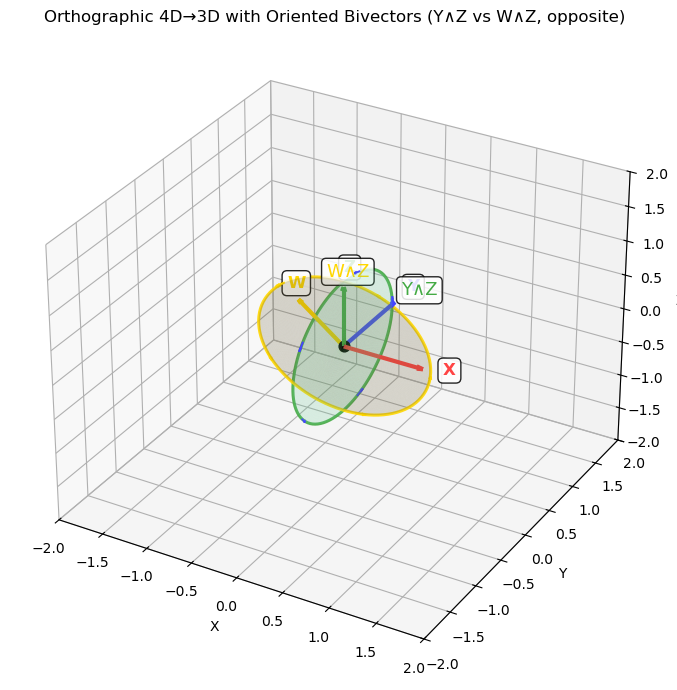

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ====== Your projection functions (copied/adapted) ======
def orthographic_project_4d_to_3d(point_4d):
    x, y, z, w = point_4d
    angle = np.pi / 6  # 30 degrees (your setting)
    # Mix x with w, and z with w to make W visible
    x_rot = x * np.cos(angle) - w * np.sin(angle)
    z_rot = z * np.cos(angle) + w * np.sin(angle)
    return np.array([x_rot, y, z_rot])

def project_4d_vecs_to_3d(basis_4d_cols):
    # basis_4d_cols: list of 4D vectors
    return np.array([orthographic_project_4d_to_3d(v) for v in basis_4d_cols]).T

# ====== Utility: oriented disk in an arbitrary 3D plane ======
def plot_oriented_bivector_disk(ax, center, u3, v3, radius=0.9,
                                face_color='tab:green', edge_color='black',
                                alpha=0.22, arrow_color=None, arrow_count=5,
                                orientation_sign=+1, label=None, label_color=None):
    """
    Draw an oriented disk spanning plane span{u3, v3} in 3D.
    u3, v3 are 3D vectors giving the disk basis (need not be unit/orthonormal).
    orientation_sign = +1 for 'counterclockwise' with respect to n = u3 x v3,
                       -1 to reverse (opposite orientation).
    """
    # Orthonormalize to get a stable rim
    U = u3 / np.linalg.norm(u3)
    V = v3 - (np.dot(v3, U) * U)
    V = V / np.linalg.norm(V)
    # Normal for label offset
    N = np.cross(U, V)
    Nn = N / (np.linalg.norm(N) + 1e-9)

    # Disk mesh
    theta = np.linspace(0, 2*np.pi, 200)
    r = np.linspace(0, radius, 40)
    T, R = np.meshgrid(theta, r)
    # Apply orientation sign by reversing parameterization direction
    TH = T if orientation_sign > 0 else -T
    X = center[0] + (R*np.cos(TH)) * U[0] + (R*np.sin(TH)) * V[0]
    Y = center[1] + (R*np.cos(TH)) * U[1] + (R*np.sin(TH)) * V[1]
    Z = center[2] + (R*np.cos(TH)) * U[2] + (R*np.sin(TH)) * V[2]

    ax.plot_surface(X, Y, Z, color=face_color, alpha=alpha, rstride=1, cstride=1, edgecolor='none')

    # Rim
    XR = center[0] + radius*np.cos(TH[0]) * U[0] + radius*np.sin(TH[0]) * V[0]
    YR = center[1] + radius*np.cos(TH[0]) * U[1] + radius*np.sin(TH[0]) * V[1]
    ZR = center[2] + radius*np.cos(TH[0]) * U[2] + radius*np.sin(TH[0]) * V[2]
    ax.plot(XR, YR, ZR, color=edge_color, linewidth=2.2, alpha=0.9)

    # Rim flow arrows to indicate rotation sense
    if arrow_count > 0:
        arrow_color = arrow_color or edge_color
        idxs = np.linspace(0, len(XR)-2, arrow_count, dtype=int)
        for i in idxs:
            # small tangent arrow
            p0 = np.array([XR[i], YR[i], ZR[i]])
            p1 = np.array([XR[i+1], YR[i+1], ZR[i+1]])
            d = p1 - p0
            d = d / (np.linalg.norm(d) + 1e-9)
            q = p0 + 0.08*d
            ax.quiver(p0[0], p0[1], p0[2], d[0], d[1], d[2],
                      length=0.12, color=arrow_color, arrow_length_ratio=0.4, linewidth=1.4)

    # Label
    if label:
        label_color = label_color or edge_color
        Lpos = center + 1.15*radius*(0.7*U + 0.3*V) + 0.2*Nn
        ax.text(Lpos[0], Lpos[1], Lpos[2], label, fontsize=13, color=label_color,
                bbox=dict(boxstyle="round,pad=0.25", facecolor="white", alpha=0.85))

# ====== Build the scene (axes + oriented bivector disks) ======
def draw_axes_and_bivectors():
    fig = plt.figure(figsize=(9, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Colors matching your description
    colX = '#FF4444'  # red/pink
    colY = '#4444FF'  # blue
    colZ = '#44AA44'  # green (slightly darker to differentiate from sphere)
    colW = '#FFD700'  # gold

    # Unit basis in 4D
    ex = np.array([1,0,0,0])
    ey = np.array([0,1,0,0])
    ez = np.array([0,0,1,0])
    ew = np.array([0,0,0,1])

    # Project basis to 3D
    X3 = orthographic_project_4d_to_3d(ex)
    Y3 = orthographic_project_4d_to_3d(ey)
    Z3 = orthographic_project_4d_to_3d(ez)
    W3 = orthographic_project_4d_to_3d(ew)

    # Draw axes
    for v3, c, lab in zip([X3, Y3, Z3, W3], [colX, colY, colZ, colW], ['X','Y','Z','W']):
        ax.quiver(0,0,0, v3[0], v3[1], v3[2], color=c, arrow_length_ratio=0.08, linewidth=3.0)
        ax.text(1.25*v3[0], 1.25*v3[1], 1.25*v3[2], lab, color=c,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.85), fontsize=12, fontweight='bold')

    ax.scatter([0],[0],[0], color='black', s=60, zorder=5)

    # Oriented bivector: Y∧Z in the Y–Z plane (orientation as right-hand rule e_y -> e_z => +e_x)
    center = np.array([0.0, 0.0, 0.0])
    u3_YZ = Y3
    v3_YZ = Z3
    plot_oriented_bivector_disk(ax, center,
                                u3=u3_YZ, v3=v3_YZ,
                                radius=0.95,
                                face_color='#6fe7a5',   # gentle green tint
                                edge_color=colZ,        # tie to Z color
                                alpha=0.20,
                                arrow_color=colY,       # tie to Y color
                                arrow_count=6,
                                orientation_sign=+1,    # choose + for Y∧Z
                                label='Y∧Z',
                                label_color=colZ)

    # Oriented bivector: W∧Z in the W–Z plane (orientation opposite to Y∧Z in the rendered 3D)
    # Build 4D plane basis: {ew, ez} then project
    u3_WZ = orthographic_project_4d_to_3d(ew)  # projected W
    v3_WZ = Z3                                 # projected Z
    # Ensure opposite visual orientation by flipping sign
    plot_oriented_bivector_disk(ax, center,
                                u3=u3_WZ, v3=v3_WZ,
                                radius=0.95,
                                face_color='#f7de7a',   # gentle gold tint
                                edge_color=colW,        # tie to W color
                                alpha=0.22,
                                arrow_color=colW,
                                arrow_count=6,
                                orientation_sign=-1,    # opposite orientation
                                label='W∧Z',
                                label_color=colW)

    # Styling to match your figure
    ax.set_xlim([-2, 2]); ax.set_ylim([-2, 2]); ax.set_zlim([-2, 2])
    ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z')
    ax.set_title('Orthographic 4D→3D with Oriented Bivectors (Y∧Z vs W∧Z, opposite)')
    ax.grid(True, alpha=0.25)

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    draw_axes_and_bivectors()


**Polar vs. Azimuthal Transformations**
In the mapping of the 4-sphere to the Riemann sphere, we distinguish between rotations that stay "on the surface" and those that move "through the core."

1. **Azimuthal Rotation (θ): The Y-Z Plane**

Operation: This corresponds to a rotation within a plane that is projected directly onto the "equator" or parallel to it.

Effect: On the complex plane, this is a phase shift: $z→ze 
^iθ$
 .

Logic: This is a pure K-type recursion step (In our model this could be considered exploration of points on the plane that might involve exploration of features in an empirical sample). It is a local rotation that preserves the magnitude (scaling) and orientation of the state.

2. **Polar Transformation (ϕ): The X-W Plane**

Operation: We note, a rotation in the X-W plane changes the polar angle (ϕ). This moves the point along the longitudinal lines of the sphere, from the North Pole toward the South Pole.

Effect (Scaling): In stereographic projection, the distance from the origin in the complex plane is given by r=cot(ϕ/2). Therefore, a polar rotation is perceived as radial scaling (dilation or contraction).

Effect (Reflection): This is the key insight. When the polar rotation reaches π (180°), you have moved from one pole to its antipode. This effectively "turns the sphere inside out" relative to the projection point.